# Reports: File preparation script
The following script takes in a single file as input. Then it does some cleaning and transformations and finally it exports the original input as a new file. In this example, the input file is a print report .cvs that will be prepared for summation in the other script "File summation script".  The script can be easily adapted to many other cases.

In [32]:
# Import libraries
import pandas as pd
pd.options.display.max_rows = 650
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### Input .csv file 'input' name here

In [33]:
# REad the file
file_name = '_0817.csv' # <- Input your filename here
print_data = pd.read_csv(file_name) 

In [34]:
# Preview data (change 0 to any number of rows)
print_data.head(0)

,cGroupID,cGroupIDBillable,cGroupName,cGroupDescription,cRowID,cRowName,cRowDescription,cTransactDate,cTransactType,cChargeAccountID,cChargeAccountType,cUserWhoPrinted,cDocumentName,cUnits,cDocumentID,cDeviceIP,cDevModel,cDevManuf,cDuration,cDestination,cFullName,cPrimaryPIN,cWorkstation,cAmount,JobProperties,cAltCost,cDepartment,cBillable,cAlternatePin,cLocation,cCustomGroup,cReleaseUserName,cScanDestType,cScanOutputFormat,cOCR,cDelivered


In [35]:
# View columns
print_data.columns.tolist()

['cGroupID',
 'cGroupIDBillable',
 'cGroupName',
 'cGroupDescription',
 'cRowID',
 'cRowName',
 'cRowDescription',
 'cTransactDate',
 'cTransactType',
 'cChargeAccountID',
 'cChargeAccountType',
 'cUserWhoPrinted',
 'cDocumentName',
 'cUnits',
 'cDocumentID',
 'cDeviceIP',
 'cDevModel',
 'cDevManuf',
 'cDuration',
 'cDestination',
 'cFullName',
 'cPrimaryPIN',
 'cWorkstation',
 'cAmount',
 'JobProperties',
 'cAltCost',
 'cDepartment',
 'cBillable',
 'cAlternatePin',
 'cLocation',
 'cCustomGroup',
 'cReleaseUserName',
 'cScanDestType',
 'cScanOutputFormat',
 'cOCR',
 'cDelivered']

In [36]:
# Remove the columns that won't be used
print_data.drop(['cGroupID',
 'cGroupIDBillable',
 'cGroupName',
 'cGroupDescription',
 'cRowID',
 'cRowName',
 'cRowDescription',
 'cChargeAccountID',
 'cChargeAccountType',
 'cDevManuf',
 'cDuration',
 'cDestination', 
 'cWorkstation',
 'cDepartment',
 'cBillable',
 'cAlternatePin',
 'cLocation',
 'cCustomGroup',
 'cScanDestType',
 'cScanOutputFormat',
 'cOCR',
 'cDelivered',
 'cDevModel',
 'cDocumentID',
 'cDocumentName',
 'cDeviceIP',
 'cReleaseUserName'], axis=1, inplace=True)

In [37]:
# Preview data (change 0 to any number of rows)
print_data.head()

,cTransactDate,cTransactType,cUserWhoPrinted,cUnits,cFullName,cPrimaryPIN,cAmount,JobProperties,cAltCost
0,2017-07-03 11:56,copy,mali2001,70,Martin Linder,1104450,"0,70",20 x A3; 50 x A4,"0,00"
1,2017-07-04 12:45,scan,zaed2001,1,Zacharias Edholm,551641966891,"0,00",1 x Unspecified/C,"0,00"
2,2017-07-04 13:15,print,alsz2001,1,Alexander Szwarcwald,551641996654,"0,01",1 x A4/C,"0,00"
3,2017-07-04 13:15,print,alsz2001,1,Alexander Szwarcwald,551641996654,"0,01",1 x A4/C,"0,00"
4,2017-07-04 13:15,print,alsz2001,1,Alexander Szwarcwald,551641996654,"0,01",1 x A4/C,"0,00"


In [38]:
# View the remaining columns
print_data.columns.tolist()

['cTransactDate',
 'cTransactType',
 'cUserWhoPrinted',
 'cUnits',
 'cFullName',
 'cPrimaryPIN',
 'cAmount',
 'JobProperties',
 'cAltCost']

In [39]:
# Rename the columns
new_labels = ['date',
 'type',
 'user',
 'units',
 'full_name',
 'pin',
 'amount',
 'properties',
 'cost']

In [40]:
# Apply the new labels
print_data.columns = new_labels

In [41]:
# Preview data (change 0 to any number of rows)
print_data.head(0)

,date,type,user,units,full_name,pin,amount,properties,cost


In [42]:
# Verify there's no empmty values (should get 0 on all)
print_data.isna().sum()

date          0
type          0
user          0
units         0
full_name     0
pin           0
amount        0
properties    0
cost          0
dtype: int64

In [43]:
# Check column data type
print_data.dtypes

date          object
type          object
user          object
units          int64
full_name     object
pin            int64
amount        object
properties    object
cost          object
dtype: object

In [44]:
# Replace comas with dots 
rep_comas = ['amount', 'cost']
for c in rep_comas:
    print_data[c] = print_data[c].map(lambda x: x.replace(',' , '.'))

In [45]:
# Convert types so they are useful for computation
conv_types = ['amount', 'cost', 'pin']
for c in conv_types:
    print_data[c] = print_data[c].astype(float)


In [46]:
# Verify new data types
print_data.dtypes

date           object
type           object
user           object
units           int64
full_name      object
pin           float64
amount        float64
properties     object
cost          float64
dtype: object

In [47]:
# View averages by 'pin' (we print the user pin number, not real user names)
print_mean = print_data.groupby('pin').units.mean()
ordered_print = print_mean.sort_values(ascending=False)
ordered_print

pin
1.104450e+06    70.000000
1.063615e+06    25.200000
1.063648e+06    11.666667
5.516420e+11     6.000000
9.500058e+06     5.250000
1.063647e+06     4.428571
5.516420e+11     3.571429
5.516420e+11     1.000000
Name: units, dtype: float64

In [232]:
ord_print_df = pd.DataFrame(ordered_print)
#ord_print_df

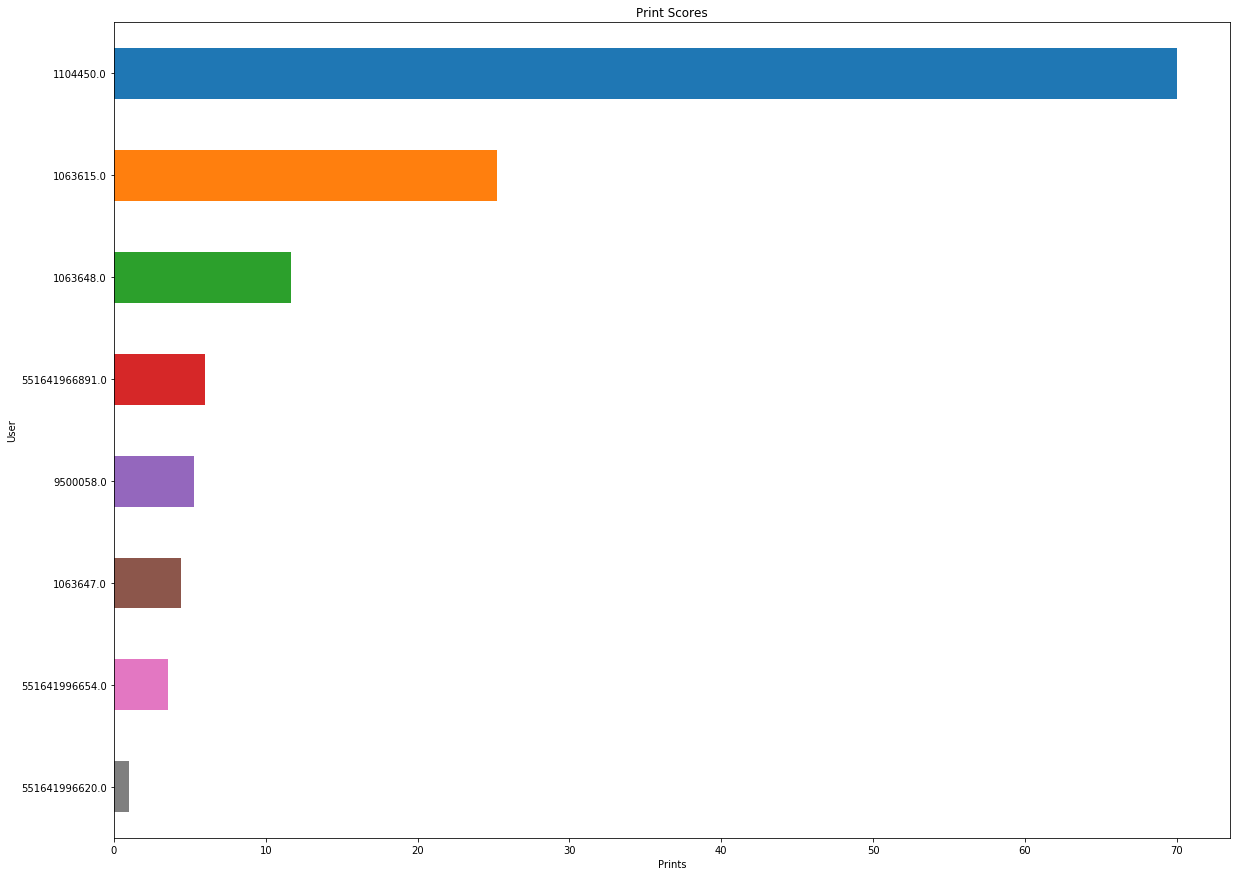

In [48]:
# Create plot of averages
ordered_print.iloc[:25].plot(kind='barh', figsize=(20,15))
plt.gca().invert_yaxis()
plt.xlabel("Prints")
plt.ylabel("User")
plt.title("Print Scores")
plt.show();

In [234]:
# View general statistics
print_data.describe()

,units,pin,amount,cost
count,39.000000,3.900000e+01,39.000000,39.0
mean,9.205128,1.697376e+11,0.085385,0.0
std,20.778505,2.579312e+11,0.208754,0.0
min,1.000000,1.063615e+06,0.000000,0.0
25%,1.000000,1.063647e+06,0.010000,0.0
50%,3.000000,1.063648e+06,0.020000,0.0
75%,8.000000,5.516420e+11,0.055000,0.0
max,114.000000,5.516420e+11,1.140000,0.0


### Input .csv file "output" name here

In [235]:
# Write to a new prepared .csv file
print_data.to_csv('print_data' + file_name)